<a href="https://colab.research.google.com/github/TRANQUOCHUY202/AI/blob/main/nhandang-10dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import thư viện
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img, img_to_array


#Preprocessing để Training 
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
train_datagen = ImageDataGenerator( rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True )

# Tải các hình ảnh trong thư mục 'Training' và 'Test'
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/BT1/10_dishes/Training', 
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/BT1/10_dishes/Test', 
                                            target_size = (30,40), 
                                            batch_size = 32, 
                                            class_mode = 'categorical')
# In ra các chỉ số tương ứng cho các loại hoa trong tập huấn luyện và tập kiểm tra
training_set.class_indices
test_set.class_indices

Found 378 images belonging to 10 classes.
Found 38 images belonging to 10 classes.


{'Banhmi': 0,
 'Banhxeo': 1,
 'BunboHue': 2,
 'Buncha': 3,
 'Caolau': 4,
 'Chaca': 5,
 'Comtam': 6,
 'Goicuon': 7,
 'Phobo': 8,
 'miquang': 9}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LeakyReLU

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=[30,40,3], padding='same'),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    LeakyReLU(alpha=0.2),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    LeakyReLU(alpha=0.2),
    Dense(32, activation='relu'),
    LeakyReLU(alpha=0.1),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 40, 32)        9248      
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 15, 20, 64)        36928     
                                                      

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Thiết lập thông số và optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Huấn luyện mô hình với callbacks
a = model.fit_generator(training_set, validation_data=test_set, epochs=100, steps_per_epoch=len(training_set), 
                              validation_steps=len(test_set))

<ipython-input-5-7dc827f54ac2>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator(training_set, validation_data=test_set, epochs=100, steps_per_epoch=len(training_set),


Epoch 1/100
12/12 [==============================] - 78s 6s/step - loss: 2.3057 - accuracy: 0.1190 - val_loss: 2.3023 - val_accuracy: 0.1053
Epoch 2/100
12/12 [==============================] - 6s 483ms/step - loss: 2.2948 - accuracy: 0.1323 - val_loss: 2.3121 - val_accuracy: 0.1053
Epoch 3/100
12/12 [==============================] - 6s 464ms/step - loss: 2.2854 - accuracy: 0.1323 - val_loss: 2.3098 - val_accuracy: 0.1053
Epoch 4/100
12/12 [==============================] - 6s 497ms/step - loss: 2.2872 - accuracy: 0.1323 - val_loss: 2.3041 - val_accuracy: 0.1053
Epoch 5/100
12/12 [==============================] - 8s 677ms/step - loss: 2.2906 - accuracy: 0.1270 - val_loss: 2.3159 - val_accuracy: 0.1053
Epoch 6/100
12/12 [==============================] - 6s 480ms/step - loss: 2.2942 - accuracy: 0.1243 - val_loss: 2.3047 - val_accuracy: 0.0789
Epoch 7/100
12/12 [==============================] - 6s 486ms/step - loss: 2.2970 - accuracy: 0.1376 - val_loss: 2.3260 - val_accuracy: 0.1053
E

In [ ]:
# đánh giá mô hình
test_loss, test_acc = model.evaluate(test_set, verbose=False)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.10363154113292694
Test accuracy: 0.9736841917037964


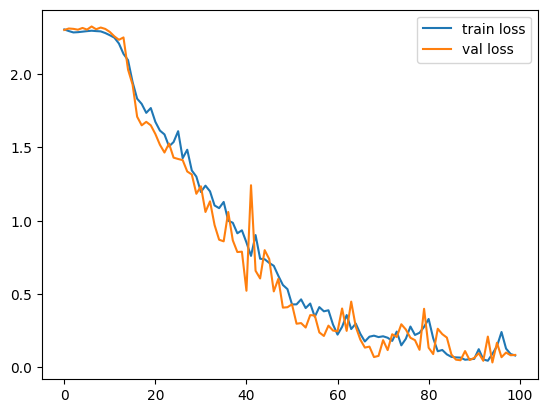

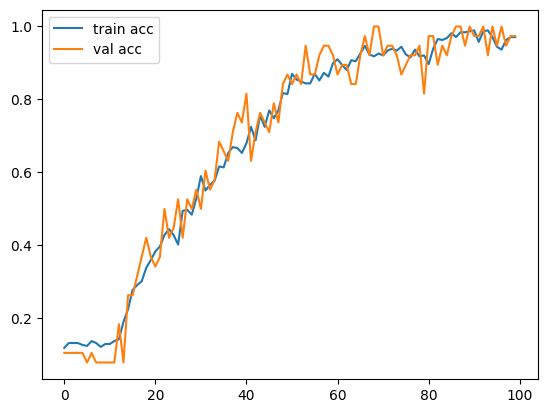

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Lưu file .h5
model.save('/content/drive/MyDrive/BT1/10_dishes/model_dish.h5')

In [ ]:
import os
os.chdir('/content/drive/MyDrive/BT1/10_dishes/Valid')

Chọn image : Anh1
1/1 [==============================] - 0s 29ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Miquang
Chọn image : anh2
Tên của hình ảnh không tồn tại 
Chọn image : Anh2
1/1 [==============================] - 0s 29ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Chaca
Chọn image : Anh5
1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Comtam
Chọn image : -


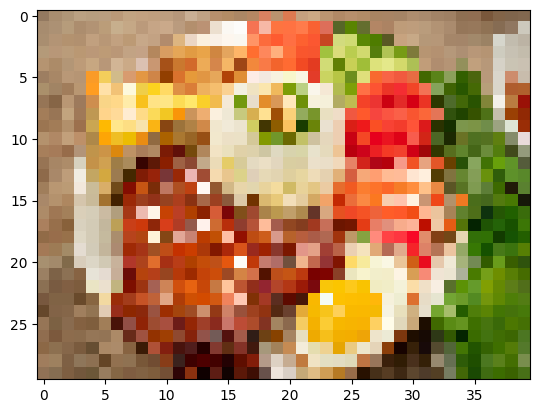

In [ ]:
import numpy as np
from keras.preprocessing import image

while 1 :
 ch = input('Chọn' ' image : ')
 if (ch=='-'):
     break
 else:
   try: 
     test_image = load_img("/content/drive/MyDrive/BT1/10_dishes/Valid/{}.jpg".format(ch),
                             target_size=(30,40)) #Scale
     test_image = img_to_array(test_image)
     plt.imshow(test_image/255)
     test_image = np.expand_dims(test_image,axis=0)
     result = model.predict(test_image)
     training_set.class_indices
     print(result)
     
     x=0
     c=0
     i=0

     while (i<10):
       if result[0][i]>=x:
         x=result[0][i]
         c=i
        
       i=i+1
     if (x==0 and c==9) :
         c=10
     if c == 0:
       prediction = 'Banhmi'
     elif c == 1:
       prediction = 'Banhxeo'
     elif c == 2:
       prediction = 'BunboHue'
     elif c == 3:
       prediction = 'Buncha'
     elif c == 4:
       prediction = 'Caolau'
     elif c==5:
       prediction ='Chaca'
     elif c == 6:
       prediction = 'Comtam'
     elif c == 7:
       prediction = 'Goicuon'
     elif c == 8:
       prediction = 'Phobo'
     elif c==9:
       prediction ='Miquang'
           
     print(prediction)
   except:
      print('Tên của hình ảnh không tồn tại '  )